Вспомним определение **доверительного интервала**: 

Доверительным интервалом называют пару статистик $\hat{\theta_1}, \hat{\theta_2}$, таких, что при всех $\theta$ выполнено равенство:

$$\mathbf{P}_{\theta}(\theta \in (\hat{\theta_1}, \hat{\theta_2})) = 1 - \alpha,$$

где $1 - \alpha$ - заданное число, называемое **уровнем доверия**. Можно требовать взамен выполнения неравенства $\geq$ или сходимости $\rightarrow$ при $n \rightarrow \infty$ (в последнем случае интервал называется асимптотическим).

## Бутстрэп или как вытаскивать себя из болота за тесемки сапог

Построение доверительного интервала фактически связано с вопросом оценки ”типичного” разброса нашей статистики вокруг настоящего параметра. 

Было бы удобно знать настоящее распределение выборки, тогда мы могли бы сгенерировать множество выборок из него, для каждой из них посчитать статистику и отсюда узнать как часто статистика отклоняется на то или иное расстояние
от нашего параметра.

К сожалению, распределения мы не знаем, зато можем попробовать оценить его.

Итак, две основных идеи таковы:
- Если мы знаем функцию распределения какой-то выборки, то с помощью метода Монте-Карло мы
можем приближенно найти моменты функций от наших величин, генерируя выборки из нашего
распределения.
- Если у нас есть "хорошая оценка" $\hat{\theta}$ неизвестного параметра $\theta$, а семейство распределений непрерывно, то $F_{\hat{\theta}}$ близка к $F_{\theta}$

Метод бутстрэпа основывается на этих двух идеях. Он называется в честь ремешков на обуви в связи с
идиомой, означающей ”вытянуть себя из трясина за ремешки на обуви” (мы в таком случае вспоминаем косичку барона Мюнхгаузена). Этот метод позволяет нам улучшить оценку с помощью самой этой оценки.

### Бутстрэп для исправления смещения оценок

Сперва отклонимся от построения доверительных интервалов и посмотрим на смещенные оценки.

Итак, пусть оценка $\hat{\theta}$ достаточно близка к $\theta$, но обладает небольшим смещением:

$$a(\theta) = \mathbf{E}_{\theta} \hat{\theta}(X_1,...,X_n) - \theta$$

Пусть она на нашей реализации выборки приняла значение $\hat{\theta}(x_1,...,x_n)$. Тогда мы можем взять множество выборок $X_{i,1},...,X_{i,n}, i = 1,...,m$ из $F_{\hat{\theta}}$ и посчитать по ним:

$$\widetilde{\theta}(X) = \frac{1}{m} \sum_{i=1}^{m} \hat{\theta}(X_{i,1},...,X_{i,n})$$

Тогда смещение $\widetilde{\theta}(X) - \hat{\theta}(X_1,...,X_n)$ при больших m близко к $a(\hat{\theta})$. В свою очередь мы можем ожидать, что $a(\hat{\theta})$ близко к $a(\theta)$. Таким образом, мы можем взять оценку

$$\hat{\theta}(x_1,...,x_n) - a(\hat{\theta}) = 2\hat{\theta}(x_1,...,x_n) - \widetilde{\theta}(X)$$

и ожидать, что ее смещение значительно меньше чем было. 

Количество выборок m здесь мы делаем достаточно большим, а размеры выборок должны быть те
же n, что и у нас на самом деле.

### Бутстрэп для оценки дисперсии

Использовать метод бутстрэпа можно и нужно не только для оценивания смещения, но и для оценки квадратичного смещения. В качестве оценки дисперсии $\hat{\theta}(X_1,...,X_n)$ возьмем:

$$\frac{1}{m}\sum_{i=1}^{m}\left(\hat{\theta}(X_{i,1},...,X_{i,n}) - \hat{\theta}(X_1,...,X_n)\right)^2$$

Получая оценку для дисперсии, мы можем, например, использовать ее для построения асимптотического доверительного интервала на основе асимптотической нормальности.

### Доверительные интервалы с помощью бутстрэпа

В качестве оценки для функции распределения используем Эмпирическую Функцию Распределения. \
Это равносильно рассмотрению выборок $X_{i,1},...,X_{i,n}, i=1...M$, взятых из нашей выборки с возвращением.


Обсудим несколько методов для постоения дов. интервала. \
Предположим, что $\hat{\theta}$ оценка какого-то параметра $\theta$.

- **Percentile**-интервал. Генерируем m выборок из функции распределения $\hat{F_n}$ (берем m выборок того же размера с возвращением из нашей выборки). Ранжируем значение нашей оценки $\hat{\theta^*}$ на этих выборках и в качестве левой границы доверительного интервала берем $[\alpha m]$-e по возрастанию из значений $\hat{\theta^*}$, а в качестве правой границы - $[(1 - \alpha) m]$-е.


- **Pivotal**-интервал. Генерируем m выборок из функции распределения $\hat{F_n}$. Ранжируем значение нашей оценки $\hat{\theta^*}$ на этих выборках. В качестве левой границы доверительного интервала берем $[\alpha m]$-e по возрастанию из значений $2\hat{\theta} - \hat{\theta^*}$, а в качестве правой границы - $[(1 - \alpha) m]$-е.


- **Normal**-интервал предлагает брать интервал $(\hat{\theta} - z_{1-\alpha/2}\hat{\sigma}, \hat{\theta} + z_{1-\alpha/2}\hat{\sigma})$, где $\hat{\sigma}$ - бутстрэп-оценка для дисперсии $\hat{\theta}$, $z_{1-\alpha/2}$ - квантиль уровня $1 - \alpha/2$ распределения $\mathit{N}(0,1)$. Этот интервал работает только для асимптотически нормальных оценок.




**Замечания:** 


- Percentile интервал опирается на то, что оценка $\hat{\theta}$ не имеет смещения и ее распределение достаточно симметрично. Из-за этого этот простой метод оказывается достаточно ненадежным — истинное значение
параметра будет вылетать из интервала значительно чаще, чем должно (возможно даже никогда в него не попадать). Использовать этот метод стоит только если вы построили график $\hat{\theta^*} - \hat{\theta}$ и он оказался симметричным около 0. Pivotal значительно менее придирчив к данным.


- Оказывается, что указанные интервалы являются асимптотическими уровня $1 - \alpha$, если наши оценки асимптотически нормальны.

### Задачи

1. В файле nissan.txt приведены данные о пробеге автомобиля Ниссан между заправками полного бака. Построить 95% доверительный интервал для среднего бутстрэпом с опцией normal. Сравнить с асимптотическим интервалом на основе нормального распределения.


2. В датасете faithful содержится информация о продолжительности извержений гейзеров и промежутках между ними. Построить 95% бутстрэп интервал для корреляции признаков. Зависимы ли они?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from tqdm import tqdm

### Задача 1

In [2]:
data_nissan = pd.read_csv('data/nissan.txt')
data_nissan

,mpg
0,21.964
1,23.694
2,18.824
3,20.851
4,26.370
...,...
95,24.514
96,24.500
97,22.344
98,22.847


In [32]:
n = len(data_nissan)
n

100

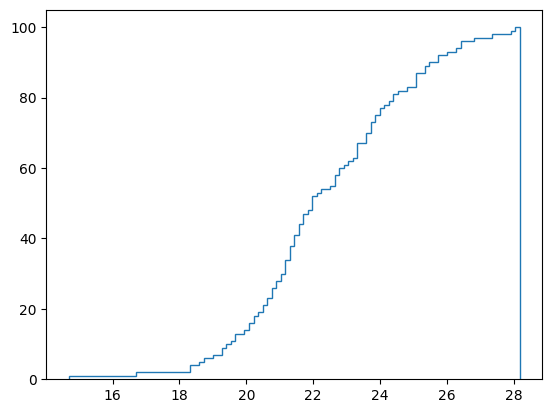

<Axes: ylabel='Density'>

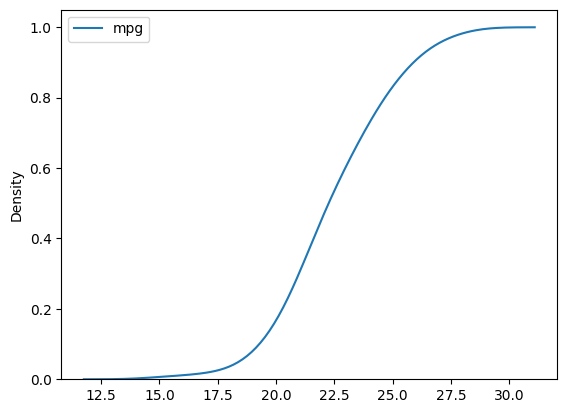

In [3]:
plt.hist(data_nissan, histtype='step', cumulative=True, bins=len(data_nissan))
plt.show()
sns.kdeplot(data_nissan, cumulative=True)

In [4]:
m = 1 * 10 ** 5
mean_nissan = np.zeros(m)
for i in tqdm(range(m)):
    mean_nissan[i] = np.random.choice(np.asarray(data_nissan.T)[0], size=100).mean()

100%|██████████| 100000/100000 [00:19<00:00, 5018.31it/s]


Из критерия Шапиро-Уилка и критерия согласия Пирсона гипотеза о нормальности распределения не отвергается. Берется много (10 ^ 5) выборок, чтобы показать, что оценка асимптотически нормальна.

In [5]:
# бутстрэп оценка для дисперсии
_mean_nissan_ = np.mean(data_nissan)
_sigma_ = np.sum((mean_nissan -  _mean_nissan_) ** 2) / m
_sigma_

0.05973606141292201

In [6]:
_z_ = np.percentile(np.random.normal(scale=1, loc=0, size=m), 97.5)
_z_

1.9637604744602035

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 6.000e+00, 1.700e+01,
        1.000e+01, 1.900e+01, 1.900e+01, 3.000e+01, 3.100e+01, 5.000e+01,
        7.100e+01, 8.100e+01, 1.020e+02, 1.610e+02, 1.650e+02, 2.300e+02,
        2.710e+02, 3.050e+02, 4.000e+02, 4.730e+02, 5.700e+02, 6.360e+02,
        7.640e+02, 8.940e+02, 1.047e+03, 1.232e+03, 1.322e+03, 1.548e+03,
        1.749e+03, 1.886e+03, 2.120e+03, 2.317e+03, 2.470e+03, 2.672e+03,
        2.766e+03, 2.996e+03, 3.172e+03, 3.317e+03, 3.300e+03, 3.551e+03,
        3.432e+03, 3.481e+03, 3.526e+03, 3.492e+03, 3.484e+03, 3.423e+03,
        3.369e+03, 3.214e+03, 2.990e+03, 2.838e+03, 2.682e+03, 2.582e+03,
        2.271e+03, 2.086e+03, 1.961e+03, 1.719e+03, 1.591e+03, 1.361e+03,
        1.206e+03, 1.079e+03, 9.040e+02, 8.010e+02, 6.600e+02, 5.690e+02,
        5.260e+02, 4.200e+02, 3.260e+02, 2.450e+02, 2.360e+02, 1.590e+02,
        1.140e+02, 1.160e+02, 8.600e+0

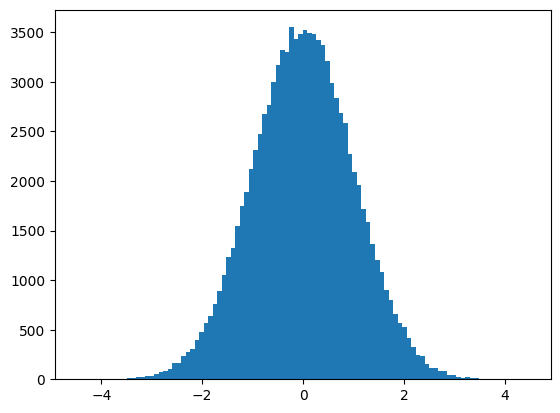

In [7]:
# проверка на асимптотическую нормальность. Видно, что распределение ~ N(0, 1)
plt.hist((mean_nissan -  _mean_nissan_) / np.sqrt(_sigma_), bins=100)

In [72]:
scipy.stats.t.ppf(0.05, df=100, loc=0, scale=1)

-1.6602343260657506

In [64]:
scipy.stats.t.ppf(0.95, df=100, loc=0, scale=1)

1.66023432606575

Оценка среднего значения: 22.411990000000007
Доверительный normal-интервал: [ 22.358179088727688 22.465800911272325 ]
Доверительный percentile-интервал: [ 21.93248925 22.891191250000002 ]


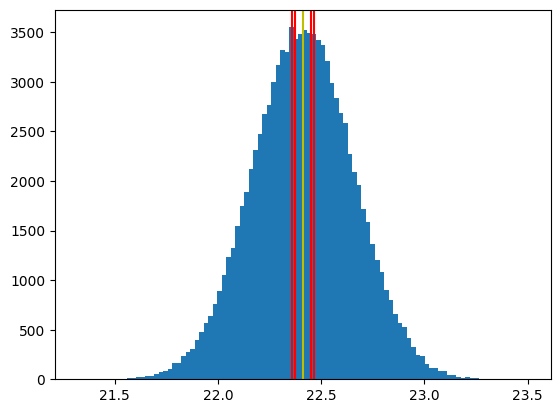

In [75]:
plt.hist(mean_nissan, bins=100)

alpha = 5
# наша оценка
plt.axvline(x=_mean_nissan_, color='y')

# Normal-интервал
plt.axvline(x=_mean_nissan_ - _z_ * _sigma_, color='r')
plt.axvline(x=_mean_nissan_ + _z_ * _sigma_, color='r')

# percentile-интервал
plt.axvline(x=_mean_nissan_ + np.sqrt(_sigma_ / n) * scipy.stats.t.ppf(0.05, df=n - 1, loc=0, scale=1), color='r')
plt.axvline(x=_mean_nissan_ + np.sqrt(_sigma_ / n) * scipy.stats.t.ppf(0.95, df=n - 1, loc=0, scale=1), color='r')


print('Оценка среднего значения:', _mean_nissan_)
print('Доверительный normal-интервал:', '[', _mean_nissan_ - _z_ * _sigma_, _mean_nissan_ + _z_ * _sigma_, ']')
print('Доверительный percentile-интервал:', '[', np.percentile(mean_nissan, alpha / 2), np.percentile(mean_nissan, 100 - alpha / 2), ']')

### Задача 2

In [9]:
data_faithful = pd.read_csv('data/Faithful.txt', delimiter='	')
data_faithful

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [10]:
m = 1 * 10 ** 5
corr_faithful = np.zeros(m)
for i in tqdm(range(m)):
    corr_faithful[i] = data_faithful.sample(272, replace=True).corr().iloc[0, 1]

100%|██████████| 100000/100000 [00:40<00:00, 2476.69it/s]


In [11]:
_z_ = data_faithful.corr().iloc[0, 1]
_z_

0.9008111683218132

Из критерия Шапиро-Уилка и критерия согласия Пирсона гипотеза о нормальности распределения отвергается. Берется много (10 ^ 5) выборок, чтобы показать, что оценка не асимптотически нормальна.

Оценка среднего значения: 0.9008111683218132
Доверительный percentile-интервал: [ 0.8825397538692564 0.917207906072068 ]


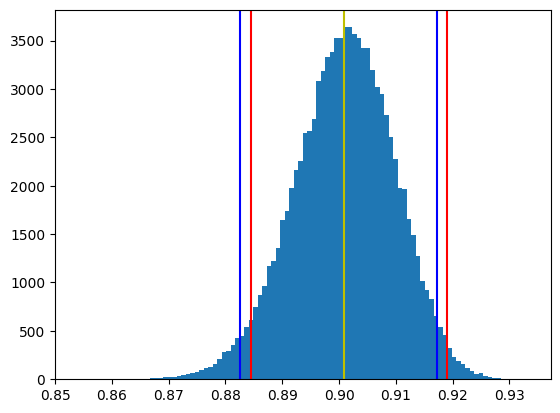

In [12]:
plt.hist(corr_faithful, bins=100)

alpha = 5
# наша оценка
plt.axvline(_z_, color='y')

# percentile-интервал
plt.axvline(x=np.percentile(corr_faithful, alpha / 2), color='b')
plt.axvline(x=np.percentile(corr_faithful, 100 - alpha / 2), color='b')

# pivotal-интервал
plt.axvline(x=np.percentile(2 * _z_ - corr_faithful, alpha / 2), color='r')
plt.axvline(x=np.percentile(2 * _z_ - corr_faithful, 100 - alpha / 2), color='r')

print('Оценка среднего значения:', _z_)
print('Доверительный percentile-интервал:', '[', np.percentile(corr_faithful, alpha / 2), np.percentile(corr_faithful, 100 - alpha / 2), ']')